In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m,n=data.shape #extracts the dimensions of the data array
np.random.shuffle(data) #Randomizing Order of Data
#Testing Data
data_dev=data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255
#Training Data
data_train = data[1000:m].T #Transpose ensure that the rows of the transposed array still represent individual data points, and the columns represent the features
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255
_,m_train = x_train.shape

In [5]:
y_train

array([6, 3, 2, ..., 4, 5, 5])

In [6]:
def init_params():
    w1 = np.random.rand(10,784) - 0.5 #represent the weights of the first layer of a neural network with 10 neurons and 784 input features
    b1 = np.random.rand(10,1) - 0.5 #represent the biases of the first layer of a neural network with 10 neurons and 784 input features
    w2 = np.random.rand(10,10) - 0.5 #represent the weights of the second layer of a neural network with 10 neurons and 10 input features
    b2 = np.random.rand(10,1) - 0.5 ##represent the biases of the second layer of a neural network with 10 neurons and 10 input features
    return w1, b1, w2, b2

def relu(x):
    return np.maximum(0,x) #Created RELU Function

def softmax(x):
    a = np.exp(x)/sum(np.exp(x))
    return a #Created Softmax Function
    
def forward_prop(w1,b1,w2,b2,x): #Forward Propogation through the layers
    z1 = w1.dot(x) + b1
    a1=relu(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def one_hot(y): #One Hot Encoding : Converting Categorical Data to Numerical Learning Data
    one_hot_y = np.zeros((y.size,y.max()+1)) #initializes an array of zeros with dimensions - number of samples, classes
    one_hot_y[np.arange(y.size),y] = 1 #Sets one_hot_y to 1 at the positions specified by the original target labels
    one_hot_y = one_hot_y.T #Transposing so that column is example (and not rows)
    return one_hot_y

def deriv_relu(z): #Derivative of RELU Function
    return z>0

def back_prop(z1,a1,z2,a2,w2,x,y): #Backward Propogation
    one_hot_y = one_hot(y) #Convert Target Label vectors to One Hot Encoded vectors
    dz2 = a2 - one_hot_y #computes the derivative of the loss with respect to the pre-activation values in the last layer
    dw2 = 1/m*dz2.dot(a1.T) #computes the gradient of the loss with respect to the weights of the second layer
    db2 = 1/m*np.sum(dz2) #computes the gradient of the loss with respect to the biases of the second layer
    dz1 = w2.T.dot(dz2) * deriv_relu(z1) #computes the derivative of the loss with respect to the pre-activation values in the first layer
    dw1 = 1/m*dz1.dot(x.T) #computes the gradient of the loss with respect to the weights of the first layer
    db1 = 1/m*np.sum(dz1) #computes the gradient of the loss with respect to the biases of the first layer
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha): #Updating Weights and Biases during Training
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

def get_pred(a2): #Getting Predictions from the Output
    return np.argmax(a2, 0) #Find the index of the maximum value along the first axis

def get_accuracy(pred, y): #Getting Accuracy of Model's Predictions
    print(pred,y)
    return np.sum(pred == y) / y.size

In [7]:
def grad_desc(x,y,epochs,alpha): #Gradient Descent
    w1,b1,w2,b2 = init_params() #Initialising Parameters
    for i in range(epochs): #Iterating over epochs
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x) #Forward Propogation
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w2,x,y) #Backward Propogation
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2, alpha) #Updating Parameters
        if i%10 == 0:
            print("Epoch: ",i)
            print("Accuracy: ", get_accuracy(get_pred(a2),y))
    return w1,b1,w2,b2

In [8]:
w1,b1,w2,b2=grad_desc(x_train,y_train,500,0.12)

Epoch:  0
[1 2 7 ... 1 1 1] [6 3 2 ... 4 5 5]
Accuracy:  0.06792682926829269
Epoch:  10
[6 4 7 ... 9 0 0] [6 3 2 ... 4 5 5]
Accuracy:  0.1999268292682927
Epoch:  20
[6 1 7 ... 4 0 0] [6 3 2 ... 4 5 5]
Accuracy:  0.327
Epoch:  30
[6 1 7 ... 4 0 0] [6 3 2 ... 4 5 5]
Accuracy:  0.4099024390243902
Epoch:  40
[6 1 7 ... 4 3 0] [6 3 2 ... 4 5 5]
Accuracy:  0.4881219512195122
Epoch:  50
[6 1 7 ... 4 8 0] [6 3 2 ... 4 5 5]
Accuracy:  0.5475121951219513
Epoch:  60
[6 1 8 ... 4 8 0] [6 3 2 ... 4 5 5]
Accuracy:  0.5927317073170731
Epoch:  70
[6 1 8 ... 4 8 0] [6 3 2 ... 4 5 5]
Accuracy:  0.6255365853658537
Epoch:  80
[6 1 8 ... 4 8 0] [6 3 2 ... 4 5 5]
Accuracy:  0.6520975609756098
Epoch:  90
[6 1 8 ... 4 8 0] [6 3 2 ... 4 5 5]
Accuracy:  0.6718780487804878
Epoch:  100
[6 1 8 ... 4 5 0] [6 3 2 ... 4 5 5]
Accuracy:  0.6899024390243902
Epoch:  110
[6 1 8 ... 4 5 0] [6 3 2 ... 4 5 5]
Accuracy:  0.7046341463414634
Epoch:  120
[6 1 8 ... 4 5 0] [6 3 2 ... 4 5 5]
Accuracy:  0.7172682926829268
Epoch:  1

In [9]:
def make_predictions(x, w1, b1, w2, b2): #Making Predictions
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_pred(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2): #Testing Predictions
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


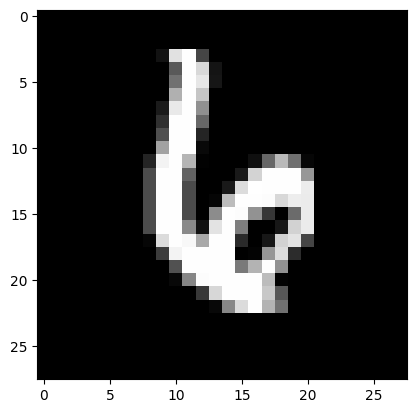

Prediction:  [3]
Label:  3


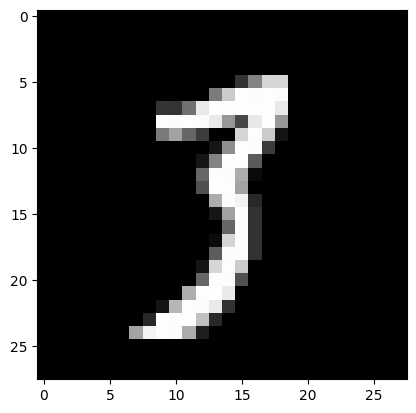

Prediction:  [8]
Label:  2


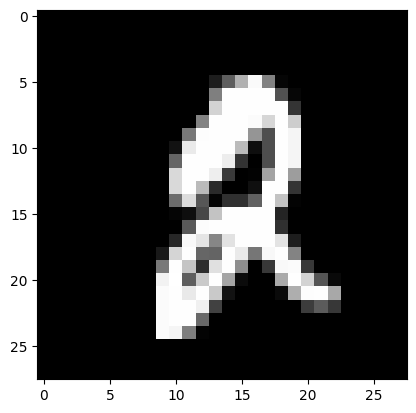

Prediction:  [8]
Label:  3


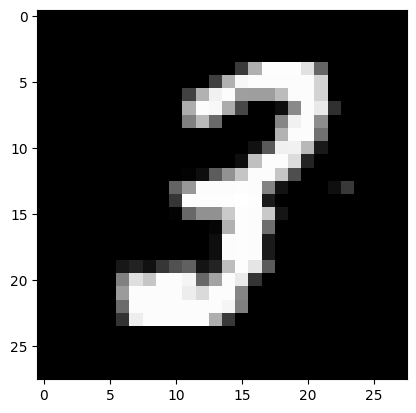

Prediction:  [2]
Label:  2


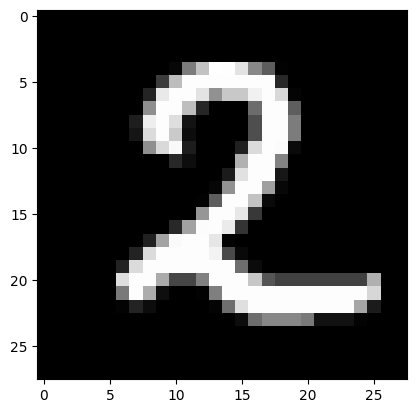

In [10]:
#Some Test Examples
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)
test_prediction(4, w1, b1, w2, b2)

In [11]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2) #Prediction on Entire Dataset
get_accuracy(dev_predictions, y_dev) #Accuracy of prediction on entire dataset

[1 7 3 0 5 7 6 8 0 2 9 1 0 2 3 4 2 5 2 0 0 1 5 1 8 5 2 3 8 8 7 6 7 2 9 2 2
 9 2 2 1 9 0 7 3 1 1 8 2 2 9 9 7 8 2 1 6 9 8 7 7 4 0 2 5 0 9 6 4 7 1 8 6 4
 4 6 3 3 8 4 7 4 3 7 8 9 9 2 4 1 9 3 8 0 4 9 4 6 5 5 9 4 8 5 1 6 4 8 8 7 4
 1 1 4 8 1 4 2 3 4 8 0 7 8 4 6 5 9 5 4 9 7 6 2 7 0 3 5 6 0 6 7 3 7 1 4 3 9
 7 3 3 6 0 2 7 7 5 6 6 0 8 7 1 3 1 2 7 2 1 8 6 5 5 0 8 1 0 3 1 5 3 9 7 6 4
 7 0 3 2 6 0 6 6 0 6 8 0 4 3 6 7 0 9 2 2 8 4 9 8 3 1 3 6 3 6 8 3 1 0 9 3 9
 4 9 2 1 0 0 7 8 6 0 4 8 1 9 3 9 1 7 3 8 9 7 4 2 2 1 9 0 1 0 0 3 8 6 4 6 6
 4 3 1 1 5 3 6 9 9 5 0 0 3 1 2 1 0 2 2 0 8 6 2 2 9 6 2 8 5 1 3 8 9 1 2 9 2
 5 9 9 5 9 0 8 7 2 5 1 4 7 8 6 0 8 4 4 3 0 2 7 9 6 7 9 2 3 3 1 1 4 8 3 6 7
 0 4 3 0 2 9 9 4 6 9 9 3 0 4 1 1 9 6 2 6 0 6 3 3 6 7 5 0 4 9 8 6 9 1 1 4 3
 5 4 2 0 5 5 1 6 2 2 2 5 3 7 2 8 8 1 2 7 1 3 0 7 2 2 6 7 1 8 1 5 0 4 3 6 3
 6 6 7 4 6 7 4 8 3 2 8 4 4 9 2 4 7 8 3 5 0 1 7 3 7 7 6 2 5 1 0 7 4 3 3 7 2
 1 4 4 2 8 5 1 9 5 7 4 4 8 9 7 1 5 7 1 3 1 2 7 7 9 2 4 0 7 4 8 4 6 9 2 2 3
 1 2 8 2 6 7 7 9 0 7 8 3 

0.866